In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Pré-processamento e seleção de features

In [3]:
tb_hotel = pd.read_csv("data/tb_hotel_traintest.csv")


In [4]:
tb_hotel.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113409 entries, 0 to 113408
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           113409 non-null  object 
 1   is_cancelled                    113409 non-null  int64  
 2   lead_time                       113409 non-null  int64  
 3   stays_in_weekend_nights         113409 non-null  int64  
 4   stays_in_week_nights            113409 non-null  int64  
 5   adults                          113409 non-null  int64  
 6   children                        113406 non-null  float64
 7   babies                          113409 non-null  int64  
 8   meal                            113409 non-null  object 
 9   country                         112951 non-null  object 
 10  market_segment                  113409 non-null  object 
 11  distribution_channel            113409 non-null  object 
 12  is_repeated_gues

## Tratando variáveis categóricas

### Usando tabelas para explorar relações entre variáveis categóricas e contínuas

Primeiro podemos utilizar o value_counts() para ver os elementos únicos da variável

In [5]:
tb_hotel["deposit_type"].value_counts()


No Deposit    99350
Non Refund    13905
Refundable      154
Name: deposit_type, dtype: int64

Podemos utilizar o value_counts() para gerar tabelas simples

In [6]:
tb_hotel[["deposit_type", "hotel"]].value_counts()


deposit_type  hotel       
No Deposit    City Hotel      63119
              Resort Hotel    36231
Non Refund    City Hotel      12280
              Resort Hotel     1625
Refundable    Resort Hotel      135
              City Hotel         19
dtype: int64

Ou então o cross-tab para uma visualização mais simples:

In [7]:
pd.crosstab(tb_hotel["hotel"], tb_hotel["deposit_type"])


deposit_type,No Deposit,Non Refund,Refundable
hotel,,,
City Hotel,63119,12280,19
Resort Hotel,36231,1625,135


o parâmetro `margins` adiciona totais de linhas e colunas:

In [8]:
pd.crosstab(tb_hotel["hotel"], tb_hotel["deposit_type"], margins=True)


deposit_type,No Deposit,Non Refund,Refundable,All
hotel,,,,
City Hotel,63119,12280,19,75418
Resort Hotel,36231,1625,135,37991
All,99350,13905,154,113409


enquanto o parâmetro `normalize` permite calcular a % por colunas (`normalize = 'columns'`)

In [9]:
pd.crosstab(
    tb_hotel["hotel"], tb_hotel["deposit_type"], margins=True, normalize="columns"
)


deposit_type,No Deposit,Non Refund,Refundable,All
hotel,,,,
City Hotel,0.63532,0.883136,0.123377,0.665009
Resort Hotel,0.36468,0.116864,0.876623,0.334991


ou por linhas (`normalize = 'index'`)

In [10]:
pd.crosstab(
    tb_hotel["hotel"], tb_hotel["deposit_type"], margins=True, normalize="index"
)


deposit_type,No Deposit,Non Refund,Refundable
hotel,,,
City Hotel,0.836922,0.162826,0.000252
Resort Hotel,0.953673,0.042773,0.003553
All,0.876033,0.122609,0.001358


ou pelo total geral (`normalize = True`)

In [11]:
pd.crosstab(tb_hotel["hotel"], tb_hotel["deposit_type"], margins=True, normalize=True)


deposit_type,No Deposit,Non Refund,Refundable,All
hotel,,,,
City Hotel,0.556561,0.108281,0.000168,0.665009
Resort Hotel,0.319472,0.014329,0.001190,0.334991
All,0.876033,0.122609,0.001358,1.000000


Podemos analisar a distribuição das variáveis continuas por duas variáveis categóricas através do método `pivot_table`

In [12]:
tb_hotel.pivot_table(index="deposit_type", columns="hotel")


adr                  adults                   agent  \
hotel         City Hotel Resort Hotel City Hotel Resort Hotel City Hotel   
deposit_type                                                               
No Deposit    107.768445    96.295776   1.860898     1.868455  25.239155   
Non Refund     93.144518    66.231748   1.803583     1.869538  42.781233   
Refundable    115.818421    71.215333   1.947368     1.911111  21.000000   

                              babies              booking_changes  \
hotel        Resort Hotel City Hotel Resort Hotel      City Hotel   
deposit_type                                                        
No Deposit     219.341904   0.005957     0.014601        0.221581   
Non Refund     168.045690   0.000000     0.000000        0.008876   
Refundable     282.800000   0.000000     0.000000        0.210526   

                           ... previous_cancellations               \
hotel        Resort Hotel  ...             City Hotel Resort Hotel   
deposit_type               ...                                       
No Deposit       0.298087  ...               0.045375     0.036516   
Non Refund       0.041231  ...               0.255945     1.568000   
Refundable       0.651852  ...               0.000000     0.000000   

             required_car_parking_spaces              stays_in_week_nights  \
hotel                         City Hotel Resort Hotel           City Hotel   
deposit_type                                                                 
No Deposit                      0.029246     0.143717             2.219569   
Non Refund                      0.000000     0.000615             1.989577   
Refundable                      0.052632     0.133333             3.315789   

                          stays_in_weekend_nights               \
hotel        Resort Hotel              City Hotel Resort Hotel   
deposit_type                                                     
No Deposit       3.147139                0.840714     1.197593   
Non Refund       2.820308                0.559772     1.078769   
Refundable       2.814815                1.315789     0.933333   

             total_of_special_requests               
hotel                       City Hotel Resort Hotel  
deposit_type                                         
No Deposit                    0.653638     0.649251  
Non Refund                    0.001629     0.001846  
Refundable                    0.631579     0.081481  

[3 rows x 36 columns]

O comportamento do método é calcular a média de cada variável numérica pela combinação das variáveis do `index` (linhas) e `columns` (colunas). Podemos alterar esse comportamento utilizando os argumentos:
* `values` para mostrar apenas uma (ou mais) variáveis continuas;
* `aggfunc` para trocar a função de agregação.

In [13]:
tb_hotel.pivot_table(index="deposit_type", columns="hotel", values="adr")


hotel,City Hotel,Resort Hotel
deposit_type,,
No Deposit,107.768445,96.295776
Non Refund,93.144518,66.231748
Refundable,115.818421,71.215333


In [14]:
tb_hotel.pivot_table(
    index="deposit_type", columns="hotel", values=["adr", "booking_changes"]
)


adr              booking_changes             
hotel         City Hotel Resort Hotel      City Hotel Resort Hotel
deposit_type                                                      
No Deposit    107.768445    96.295776        0.221581     0.298087
Non Refund     93.144518    66.231748        0.008876     0.041231
Refundable    115.818421    71.215333        0.210526     0.651852

In [15]:
tb_hotel.pivot_table(
    index="deposit_type",
    columns="hotel",
    values=["adr", "booking_changes"],
    aggfunc="median",
)


adr              booking_changes             
hotel        City Hotel Resort Hotel      City Hotel Resort Hotel
deposit_type                                                     
No Deposit        101.5         76.5               0            0
Non Refund         90.0         70.0               0            0
Refundable        100.0         66.0               0            0

### Entrada de variáveis categóricas em modelos

**Variáveis categóricas só podem entrar como features de um modelo** através de alguma estratégia para **transforma-las em variáveis continuas**. Podemos adotar **duas estratégias distintas**:

* **Ordinal encoding**, onde convertemos uma escala categórica em uma escala numérica.
* **One hot encoding**, onde utilizamos variáveis dummy binárias para representar cada nível de uma categoria;

A escolha de uma estratégia **depende da variável que queremos transformar**.

#### Variáveis Ordinais

#### Variáveis dummy

A **forma mais simples** de transformar uma variável categórica em variáveis dummies é atrvés da função `pd.get_dummies()`.

In [16]:
pd.get_dummies(tb_hotel["deposit_type"])


,No Deposit,Non Refund,Refundable
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
113404,1,0,0
113405,1,0,0
113406,1,0,0
113407,1,0,0


In [17]:
pd.get_dummies(tb_hotel["deposit_type"]).mean()


No Deposit    0.876033
Non Refund    0.122609
Refundable    0.001358
dtype: float64

Ao passarmos um **DataFrame**, *não uma série*, a função automaticamente cria um **prefixo para cada variável** categórica transformada (*evitando colisão entre variáveis que tenham níveis com o mesmo nome* )

In [18]:
pd.get_dummies(tb_hotel[["deposit_type", "hotel"]])


,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,hotel_City Hotel,hotel_Resort Hotel
0,1,0,0,0,1
1,1,0,0,0,1
2,1,0,0,0,1
3,1,0,0,0,1
4,1,0,0,0,1
...,...,...,...,...,...
113404,1,0,0,1,0
113405,1,0,0,1,0
113406,1,0,0,1,0
113407,1,0,0,1,0


Podemos re-agregar as variáveis ao nosso DataFrame utilizando a função `pd.concat`:

In [19]:
tb_hotel_enriq = pd.concat(
    [tb_hotel, pd.get_dummies(tb_hotel[["deposit_type", "hotel"]])], axis=1
)


In [20]:
tb_hotel_enriq[["deposit_type_No Deposit"]]


,deposit_type_No Deposit
0,1
1,1
2,1
3,1
4,1
...,...
113404,1
113405,1
113406,1
113407,1


Variáveis categóricas transformadas em variáveis dummies dessa forma são completamente colineares entre si: **a soma entre as variáveis dummies representando uma única categórica sempre sera 1**. Como vimos antes, colinearidades deste tipo **são um problema sério** (em geral fatal) para maior parte dos algoritmos de ML.

Para tratar isso podemos utilizar o argumento `drop_first = True`, que criará `n-1` variáveis dummy para uma categoria com `n` níveis.

In [21]:
pd.get_dummies(tb_hotel["deposit_type"])


,No Deposit,Non Refund,Refundable
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
113404,1,0,0
113405,1,0,0
113406,1,0,0
113407,1,0,0


In [22]:
pd.get_dummies(tb_hotel["deposit_type"], drop_first=True)


,Non Refund,Refundable
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
113404,0,0
113405,0,0
113406,0,0
113407,0,0


Embora a função `pd.get_dummies` seja muito simples de se utilizar ela tem um problema quando estamos lidando com modelos preditivos: os dados que vamos prever podem contem menos níveis das variáveis categóricas, levando a construção de menos colunas:

In [23]:
samp = tb_hotel[0:50]


In [24]:
pd.get_dummies(samp[["deposit_type", "hotel"]]).head()


,deposit_type_No Deposit,hotel_Resort Hotel
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


Os modelos preditivos esperam sempre o mesmo número de colunas que alimentamos na fase de treinamento... Precisamos de uma forma de criar colunas para cada nível que tinhamos no conjunto original, mesmo que elas sejam 0 por completo.

A forma mais segura de construir isso é através do objeto `OneHotEncoder` da `sklearn.preprocessing`.

In [25]:
from sklearn.preprocessing import OneHotEncoder


Vamos criar o objeto com dois argumentos:

* `sparse = False` para que ele retorne um array e não uma matriz esparsa
* `drop = 'First'` para que ele não crie dummies colineares

Utilizamos o argumento `sparse` apenas se vamos transformar o dado em um DataFrame. Caso vá ser alimentado diretamente ao modelo, náo precisamos adicionar isso.

In [26]:
ohe_fit = OneHotEncoder(sparse=False, drop="first")
ohe_fit.fit(tb_hotel[["deposit_type", "hotel"]])


OneHotEncoder(drop='first', sparse=False)

In [27]:
ohe_fit.transform(tb_hotel[["deposit_type", "hotel"]])


array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

O `OneHotEncoder` produz um array sem os nomes das colunas criadas! Caso queiramos recriar o comportamento da `pd.get_dummies` precisamos extrair o nome das colunas e criar um **DataFrame** com isso.

In [28]:
pd.DataFrame(
    ohe_fit.transform(tb_hotel[["deposit_type", "hotel"]]),  # Matriz de dados
    columns=ohe_fit.get_feature_names_out(),
)


,deposit_type_Non Refund,deposit_type_Refundable,hotel_Resort Hotel
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
113404,0.0,0.0,0.0
113405,0.0,0.0,0.0
113406,0.0,0.0,0.0
113407,0.0,0.0,0.0


Vamos confirmar como o `OneHotEncoder` se comporta em nossos dados que não tem todos níveis de cada categoria.

In [29]:
pd.DataFrame(
    ohe_fit.transform(samp[["deposit_type", "hotel"]]),  # Matriz de dados
    columns=ohe_fit.get_feature_names_out(),
).head()


,deposit_type_Non Refund,deposit_type_Refundable,hotel_Resort Hotel
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


Perfeito! Quando utilizamos um ou o outro? A função `pd.get_dummies` é utilizada para uma exploração mais rápida, enquanto o objeto `OneHotEncoder` é utilizado em pipelines preditivas.

#### Redução de features categóricas

A estratégia de one hot encoding produz muitos features - para cada variável categórica tratada dessa maneira acabamos incorporando `n` novas variáveis, onde `n` é o número de níveis (valor únicos) da categoria transformada.

Será que podemos utilizar um algoritmo de redução de features, como PCA, para reduzir esse número de variáveis?

In [31]:
from sklearn.decomposition import PCA


Primeiro precisamos criar a tabela de variáveis dummies a partir das categorias de nosso dataset

In [34]:
tb_hotel.select_dtypes(object).info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113409 entries, 0 to 113408
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   hotel                    113409 non-null  object
 1   meal                     113409 non-null  object
 2   country                  112951 non-null  object
 3   market_segment           113409 non-null  object
 4   distribution_channel     113409 non-null  object
 5   reserved_room_type       113409 non-null  object
 6   assigned_room_type       113409 non-null  object
 7   deposit_type             113409 non-null  object
 8   customer_type            113409 non-null  object
 9   reservation_status_date  113409 non-null  object
 10  arrival_date             113409 non-null  object
dtypes: object(11)
memory usage: 9.5+ MB


Utilizando o método `select_dtypes` podemos ver todas as variáveis não-numéricas do dataset. Além das duas datas, todas as outras são variáveis categóricas. Antes de utilizar o método acima, no entanto, precisamos garantir que o dataset em questão não tenha variáveis categóricas aparecendo numericamente.

In [52]:
# Vamos montar um DataFrame apenas com as variáveis categóricas combinando select_dtypes com drop
tb_hotel_cat = (
    tb_hotel.select_dtypes(object)
    .drop(["reservation_status_date", "arrival_date"], axis=1)
    .copy()
)
# Agora vamos utilizar o OneHotEncoder para converter este dataframe em um novo dataframe com as
# variáveis dummies
hotel_encoder = OneHotEncoder(drop="first", sparse=False)
tb_hotel_dum = pd.DataFrame(
    hotel_encoder.fit_transform(tb_hotel_cat),
    columns=hotel_encoder.get_feature_names_out(),
)
print(tb_hotel_dum.shape)


(113409, 215)


Como podemos ver, ao converter as 9 variáveis categóricas em dummies geramos um total de 215 variáveis! Vamos investigar como o PCA destas 215 variáveis se comporta.

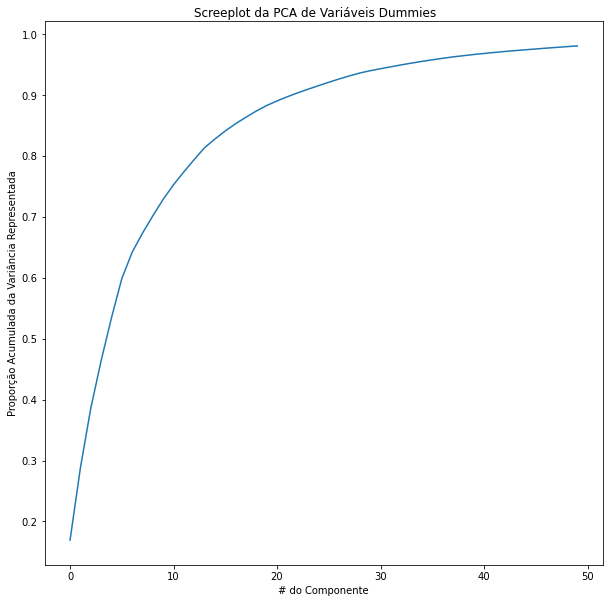

In [59]:
# Inicializamos o PCA e fittamos a tabela com variáveis dummies
pca_dum = PCA()
pca_dum.fit(tb_hotel_dum)
# Vamos ver a contribuição dos 50 primeiros componentes
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(np.cumsum(pca_dum.explained_variance_ratio_[0:50]))
ax.set_xlabel("# do Componente")
ax.set_ylabel("Proporção Acumulada da Variância Representada")
fig.suptitle("Screeplot da PCA de Variáveis Dummies", y=0.9)


A primeira vista, utilizando PCA conseguiremos reduzir este número de novas variáveis para algo mais tratável. Vamos utilizar a biblioteca `kneed` para estimar precisamente o número de componentes.

13 componentes representando 81.38% da variância


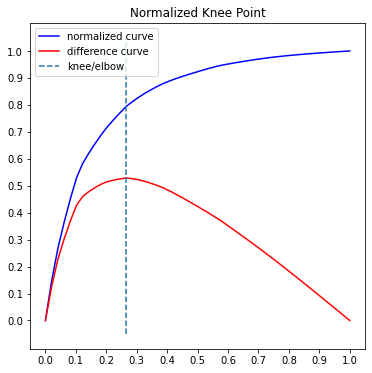

In [64]:
from kneed import KneeLocator

kl = KneeLocator(
    range(0, 50), np.cumsum(pca_dum.explained_variance_ratio_[0:50]), curve="concave"
)
kl.plot_knee_normalized()
print(f"{kl.knee} componentes representando {round(kl.knee_y*100, 2)}% da variância")


Como podemos testar se a rotina acima representou bem as variáveis categóricas nestes 13 componentes? Como estamos tratando de um problema de classificação podemos testar o resultado de dois classificadores 1NN: um utilizando as variáveis dummy e o outro os componentes da PCA e comparar o erro entre eles.

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score


In [70]:
# Primeiro dividimos as nossas variáveis em train e test
X_train, X_test, y_train, y_test = train_test_split(
    tb_hotel_dum, tb_hotel["is_cancelled"], test_size=0.2
)
# Fitamos o PCA de 13 componentes sobre o conjunto X_train
pca_fit = PCA(n_components=13)
pca_train = pca_fit.fit_transform(X_train)
# Geramos a pca_test utilizando o mesmo pca_fit
pca_test = pca_fit.transform(X_test)
# Inicializamos os dois modelos KNN
knn_org = KNeighborsClassifier(n_neighbors=1)
knn_pca = KNeighborsClassifier(n_neighbors=1)
# Fitamos o modelo knn_org nos dados originais e o knn_pca nos dados da PCA
knn_org.fit(X_train, y_train)
knn_pca.fit(pca_train, y_train)
# Avaliamos o erro de cada modelo sobre o conjunto teste
f1_org = f1_score(y_test, knn_org.predict(X_test))
f1_pca = f1_score(y_test, knn_pca.predict(pca_test))
print(f"Resultado KNN Original: {round(f1_org, 2)}")
print(f"Resultado KNN PCA: {round(f1_pca, 2)}")


Resultado KNN Original: 0.63
Resultado KNN PCA: 0.62


Podemos ver acima que, de um ponto de vista puramente preditivo, os dois resultados são praticamente equivalentes!

Existem outras transformações que, para variáveis binarias (como as variáveis dummy) ou variáveis de contagem são mais efetivas que o PCA. Uma técnica tradicional utilizada é o NMF (fatoração de matrizes não-negativas)

In [71]:
from sklearn.decomposition import NMF


In [75]:
nmf_fit = NMF(n_components=13)
nmf_train = nmf_fit.fit_transform(X_train)
nmf_test = nmf_fit.transform(X_test)
knn_nmf = KNeighborsClassifier(n_neighbors=1)
knn_nmf.fit(nmf_train, y_train)
f1_nmf = f1_score(y_test, knn_nmf.predict(nmf_test))
print(f"Resultado KNN Original: {round(f1_org, 2)}")
print(f"Resultado KNN PCA: {round(f1_pca, 2)}")
print(f"Resultado KNN NMF: {round(f1_nmf, 2)}")


/Users/pedroteche/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


Resultado KNN Original: 0.63
Resultado KNN PCA: 0.62
Resultado KNN NMF: 0.64


No entanto a escolha do número de componentes em um NMF é muito mais complexa que a escolha dos componentes do PCA - na construção de modelos preditivios podemos utilizar uma rotina semelhante a que utilizamos acima só que ao invés de comparar 3 dados diferentes (original, PCA e NMF) comparamos a performance utilizando diferentes números de componentes.

## Tratando variáveis datetime
O primeiro passo para tratar variáveis de data (e datetime) é converte-las em objetos datetime.

In [83]:
tb_hotel["arrival_dt"] = pd.to_datetime(tb_hotel["arrival_date"])
tb_hotel["update_dt"] = pd.to_datetime(tb_hotel["reservation_status_date"])


Variáveis de data são algo entre variáveis continuas e variáveis categóricas - muitas vezes utilizamos as duas interpretações em um mesmo problema!

In [84]:
tb_hotel["arrival_dt"].describe(datetime_is_numeric=True)


count                           113409
mean     2016-08-28 11:29:34.240139520
min                2015-07-01 00:00:00
25%                2016-03-13 00:00:00
50%                2016-09-05 00:00:00
75%                2017-03-18 00:00:00
max                2017-08-31 00:00:00
Name: arrival_dt, dtype: object

In [85]:
tb_hotel["update_dt"].describe(datetime_is_numeric=True)


count                           113409
mean     2016-07-29 17:37:03.537814528
min                2014-10-17 00:00:00
25%                2016-02-01 00:00:00
50%                2016-08-06 00:00:00
75%                2017-02-08 00:00:00
max                2017-09-14 00:00:00
Name: update_dt, dtype: object

Uma tarefa comum é calcular o tempo elapsado entre duas variáveis de data em alguma unidade de tempo (dias, horas, segundos, etc...).

In [87]:
tb_hotel["diff_reserva_arrival"] = tb_hotel["arrival_dt"] - tb_hotel["update_dt"]
tb_hotel["diff_reserva_arrival"].describe()


count                        113409
mean     29 days 17:52:30.702325212
std      70 days 03:33:11.023735685
min              -69 days +00:00:00
25%               -3 days +00:00:00
50%               -1 days +00:00:00
75%                26 days 00:00:00
max               526 days 00:00:00
Name: diff_reserva_arrival, dtype: object

Como podemos ver acima, o objeto resultante da subtração de datas é um objeto difftime. Podemos usar o atributo `.dt` para acessar os métodos de datas sem precisar construir um `apply` para converte-lo em uma variável numérica.

In [99]:
tb_hotel["sec_upd_arriv"] = tb_hotel["diff_reserva_arrival"].dt.total_seconds()
tb_hotel["sec_upd_arriv"]


0              0.0
1              0.0
2         -86400.0
3         -86400.0
4        -172800.0
            ...   
113404   -604800.0
113405   -604800.0
113406   -604800.0
113407   -604800.0
113408   -777600.0
Name: sec_upd_arriv, Length: 113409, dtype: float64

O método `total_seconds()` converte uma diferença entre datas em uma variável numérica contendo o número de segundos. Podemos utilizar essa variável para calcular outras unidades de tempo continuo (como horas e dias). 

Outra operação comum é adicionar (ou subtrair) uma variável numérica de uma data (conhecendo a unidade da variável numérica). Para essa tarefa utilizaremos a função `pd.to_timedelta`.

In [105]:
# Vamos calcular a data na qual foi feita a reserva a partir da data de chegada e o lead time.
tb_hotel["reserva_dt"] = tb_hotel["arrival_dt"] - pd.to_timedelta(
    tb_hotel["lead_time"], unit="d"
)
tb_hotel[["reserva_dt", "lead_time", "arrival_dt"]]


,reserva_dt,lead_time,arrival_dt
0,2014-07-24,342,2015-07-01
1,2013-06-24,737,2015-07-01
2,2015-06-24,7,2015-07-01
3,2015-06-18,13,2015-07-01
4,2015-06-17,14,2015-07-01
...,...,...,...
113404,2017-08-07,23,2017-08-30
113405,2017-05-21,102,2017-08-31
113406,2017-07-28,34,2017-08-31
113407,2017-05-14,109,2017-08-31


Como podemos ver, utilizamos a `pd.to_timedelta` para converter o `lead_time` em uma diferença de dias (especificado pelo argumento `unit = "d"`).

Outra transformação comum aplicada à datas é a transformação para variáveis categóricas (como por exemplo mês do ano, dia do mês e semana do ano). Para essas conversões utilizamos os diferentes métodos presentes no atributo `.dt`.

In [109]:
# Aqui utilizamos o método astype para converter o mês numérico em categoria.
tb_hotel['mes_reserva'] = tb_hotel["reserva_dt"].dt.month.astype(str)
tb_hotel['mes_reserva']

0         7
1         6
2         6
3         6
4         6
         ..
113404    8
113405    5
113406    7
113407    5
113408    2
Name: mes_reserva, Length: 113409, dtype: object

In [112]:
# O atributo week nos retorna o número da semana no ano
tb_hotel['semana_reserva'] = tb_hotel["reserva_dt"].dt.week.astype(str)
tb_hotel['semana_reserva']

/var/folders/c2/4vv1dtt97gl9bn1lvw8rf0k40000gn/T/ipykernel_1146/2761786052.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  tb_hotel['semana_reserva'] = tb_hotel["reserva_dt"].dt.week.astype(str)


0         30
1         26
2         26
3         25
4         25
          ..
113404    32
113405    20
113406    30
113407    19
113408     5
Name: semana_reserva, Length: 113409, dtype: object

In [113]:
# O atributo weekday extrai o dia da semana (segunda, terça, etc...)
tb_hotel['dia_semana_reserva'] = tb_hotel["reserva_dt"].dt.weekday.astype(str)
tb_hotel['dia_semana_reserva']

0         3
1         0
2         2
3         3
4         2
         ..
113404    0
113405    6
113406    4
113407    6
113408    6
Name: dia_semana_reserva, Length: 113409, dtype: object

## Tratando variáveis continuas

## Seleção automática de features